# Neural Network Strategy with Technical Indicators

This notebook implements and analyzes a trading strategy that combines technical indicators with neural networks for S&P 500 stocks. We'll examine both price and return predictions using cross-validation.

In [1]:
import sys
import os

# Get the parent directory of the "notebook" folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to the Python path
sys.path.append(project_root)

In [3]:
from strategies.technical_nn import TechnicalNNStrategy
from utils.backtest import Backtest
from utils.data_handler import DataHandler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Price Prediction Analysis

In [8]:
print(f"\nAnalyzing AAPL - Price Prediction (In-Sample)")

# Load in-sample data
data_handler_in = DataHandler(ticker="AAPL", start_date="2010-01-01", end_date="2015-12-31")
in_sample_data = data_handler_in.fetch_data()

# Initialize and fit strategy
nn_strategy = TechnicalNNStrategy(prediction_type='price', n_splits=5, epochs=50)
nn_strategy.fit(in_sample_data)  # Only trains once

# Print CV scores
print("\nCross-validation MSE scores (in-sample):")
for i, score in enumerate(nn_strategy.cv_scores, 1):
    print(f"Fold {i}: {score:.6f}")
print(f"\nMean MSE: {np.mean(nn_strategy.cv_scores):.6f}")
print(f"Std MSE: {np.std(nn_strategy.cv_scores):.6f}")


# Load out-of-sample data
data_handler_out = DataHandler(ticker="AAPL", start_date="2016-01-01", end_date="2019-12-31")
out_sample_data = data_handler_out.fetch_data()

# Use previously trained model to backtest
backtester = Backtest(out_sample_data, nn_strategy)
results = backtester.run()

# Print results
print("\nOut-of-sample Backtest Results:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")




Analyzing AAPL - Price Prediction (In-Sample)
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed



Cross-validation MSE scores (in-sample):
Fold 1: 0.002077
Fold 2: 0.006058
Fold 3: 0.000430
Fold 4: 0.007608
Fold 5: 0.002970

Mean MSE: 0.003829
Std MSE: 0.002631


[*********************100%***********************]  1 of 1 completed


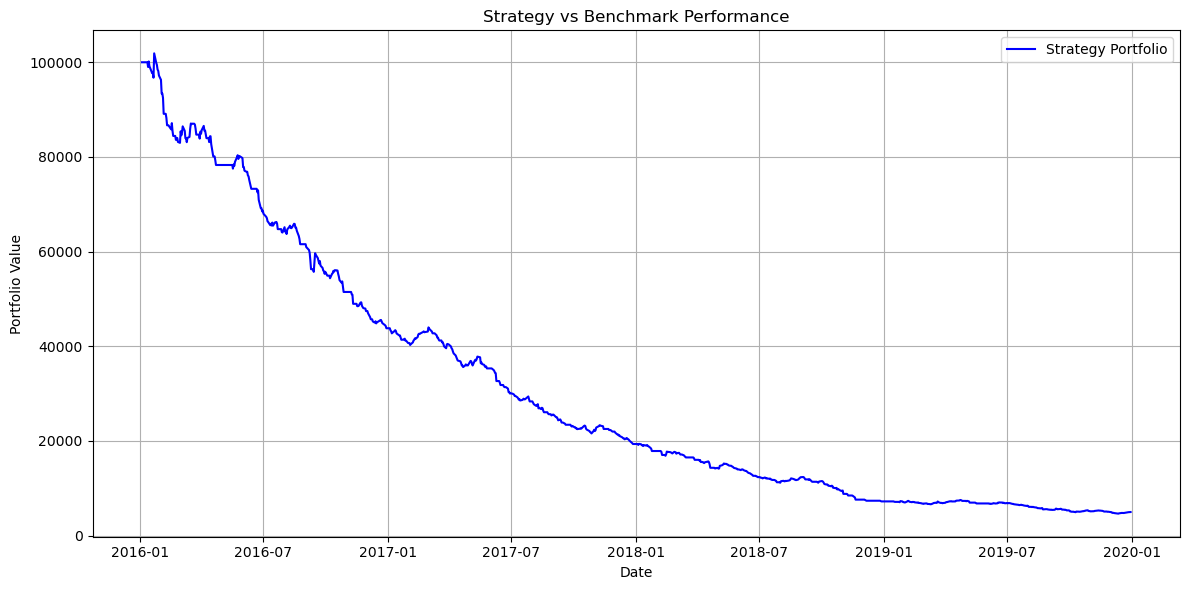


Out-of-sample Backtest Results:
Final Value: 4976.6477
Return: -0.9502
Sharpe Ratio: -4.2608
Max Drawdown: -0.9546


In [9]:
# Load out-of-sample data
data_handler_out = DataHandler(ticker="AAPL", start_date="2016-01-01", end_date="2019-12-31")
out_sample_data = data_handler_out.fetch_data()

# Use previously trained model to backtest
backtester = Backtest(out_sample_data, nn_strategy)
results = backtester.run()

# Print results
print("\nOut-of-sample Backtest Results:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")


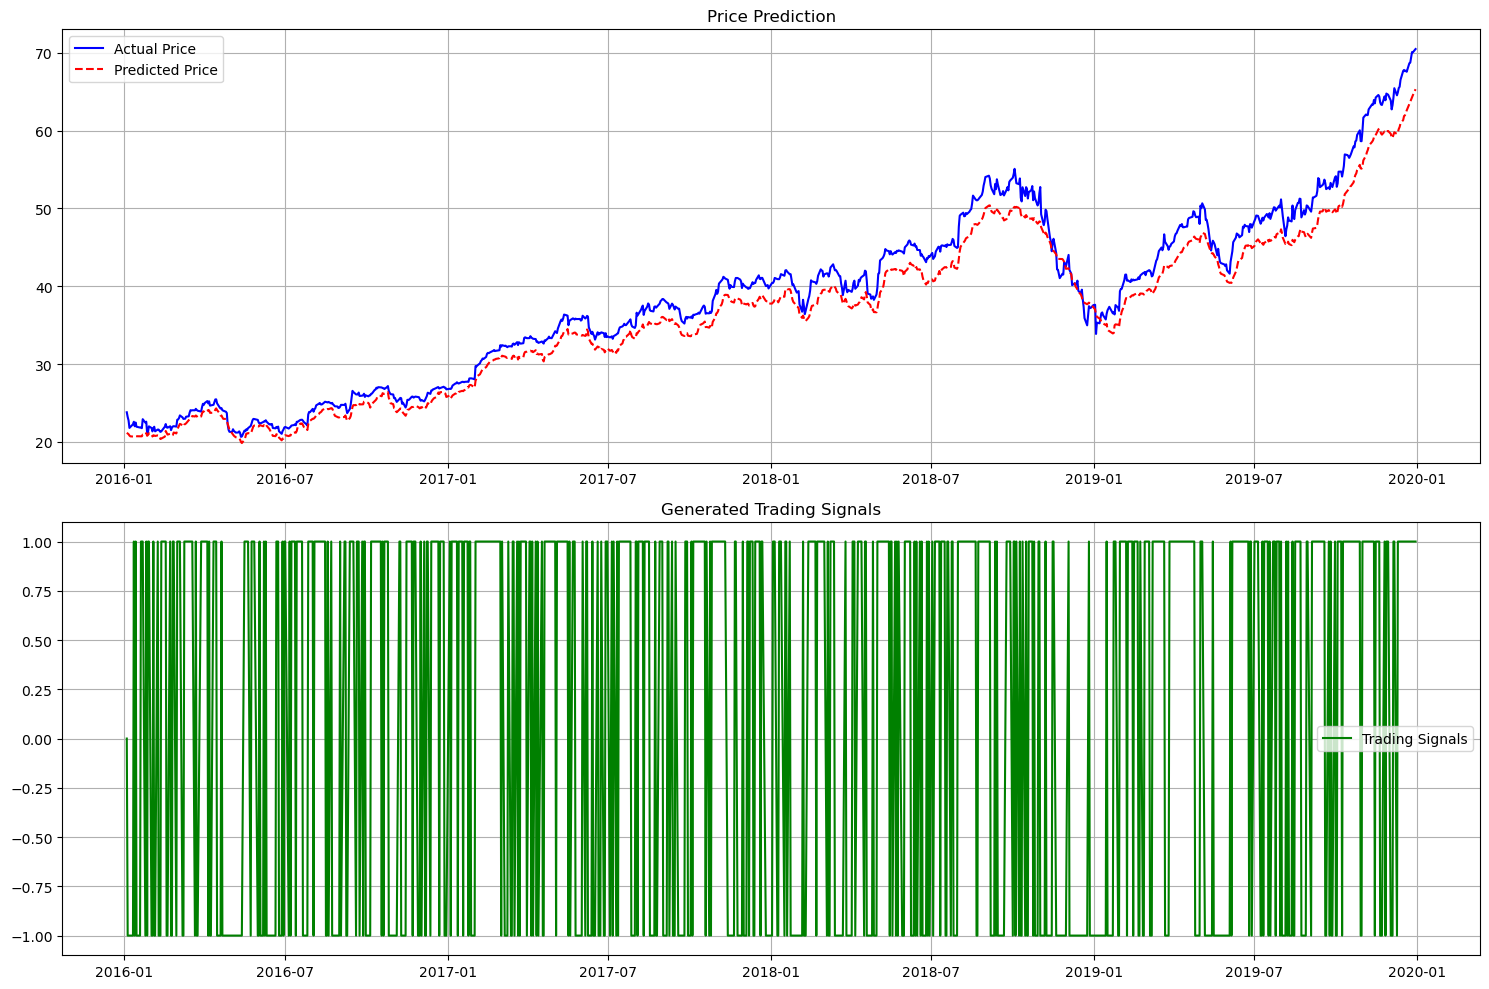


Cross-validation MSE scores:
Fold 1: 0.002077
Fold 2: 0.006058
Fold 3: 0.000430
Fold 4: 0.007608
Fold 5: 0.002970
Average MSE: 0.003829 (±0.002631)


In [10]:
nn_strategy.plot_signals(out_sample_data)

Altough the price prediction seems to follow closely the movements, there is an error on the absolute value. Therefore, the generated PnL and Sharpe ratio are pretty bad.

## 3. Return Prediction Analysis

In [5]:
print(f"\nAnalyzing AAPL - Return Prediction (In-Sample)")

# Load in-sample data
data_handler_in = DataHandler(ticker="AAPL", start_date="2010-01-01", end_date="2015-12-31")
in_sample_data = data_handler_in.fetch_data()

# Initialize and fit strategy
nn_strategy_returns = TechnicalNNStrategy(prediction_type='return', n_splits=5, epochs=50)
nn_strategy_returns.fit(in_sample_data)

# Print CV scores
print("\nCross-validation MSE scores (in-sample):")
for i, score in enumerate(nn_strategy_returns.cv_scores, 1):
    print(f"Fold {i}: {score:.6f}")
print(f"\nMean MSE: {np.mean(nn_strategy_returns.cv_scores):.6f}")
print(f"Std MSE: {np.std(nn_strategy_returns.cv_scores):.6f}")



Analyzing AAPL - Return Prediction (In-Sample)
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed



Cross-validation MSE scores (in-sample):
Fold 1: 0.006563
Fold 2: 0.033271
Fold 3: 0.007263
Fold 4: 0.004413
Fold 5: 0.006599

Mean MSE: 0.011622
Std MSE: 0.010867


[*********************100%***********************]  1 of 1 completed


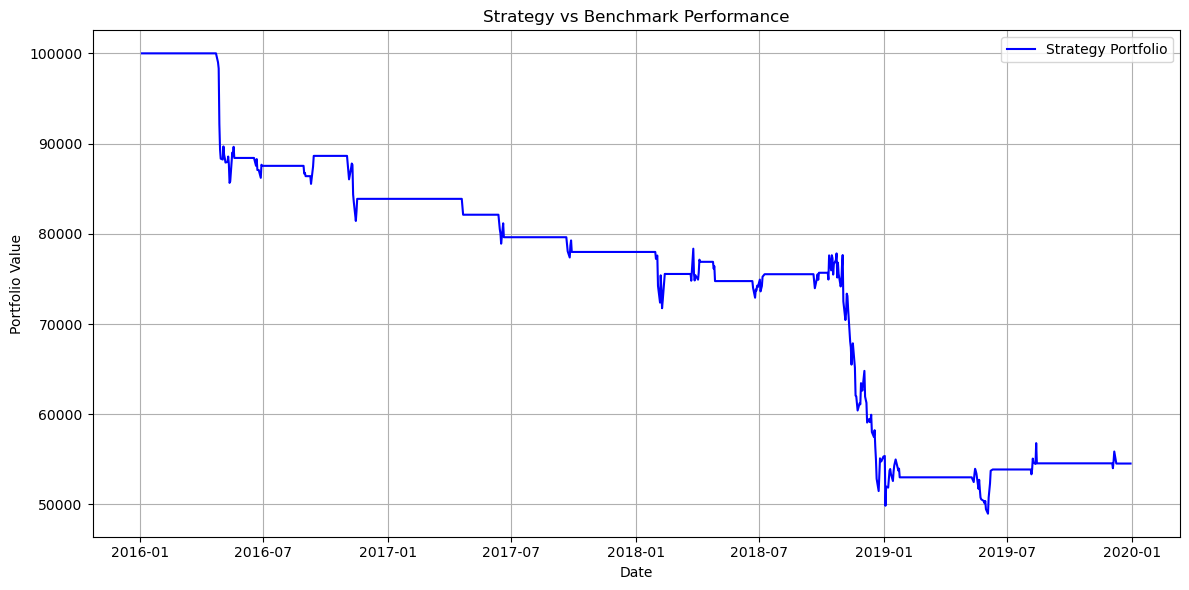


Out-of-sample Backtest Results:
Final Value: 54536.0201
Return: -0.4546
Sharpe Ratio: -0.9196
Max Drawdown: -0.5102


In [6]:
# Load out-of-sample data
data_handler_out = DataHandler(ticker="AAPL", start_date="2016-01-01", end_date="2019-12-31")
out_sample_data = data_handler_out.fetch_data()

# Use previously trained model to backtest
backtester = Backtest(out_sample_data, nn_strategy_returns)
results = backtester.run()

# Print results
print("\nOut-of-sample Backtest Results:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")


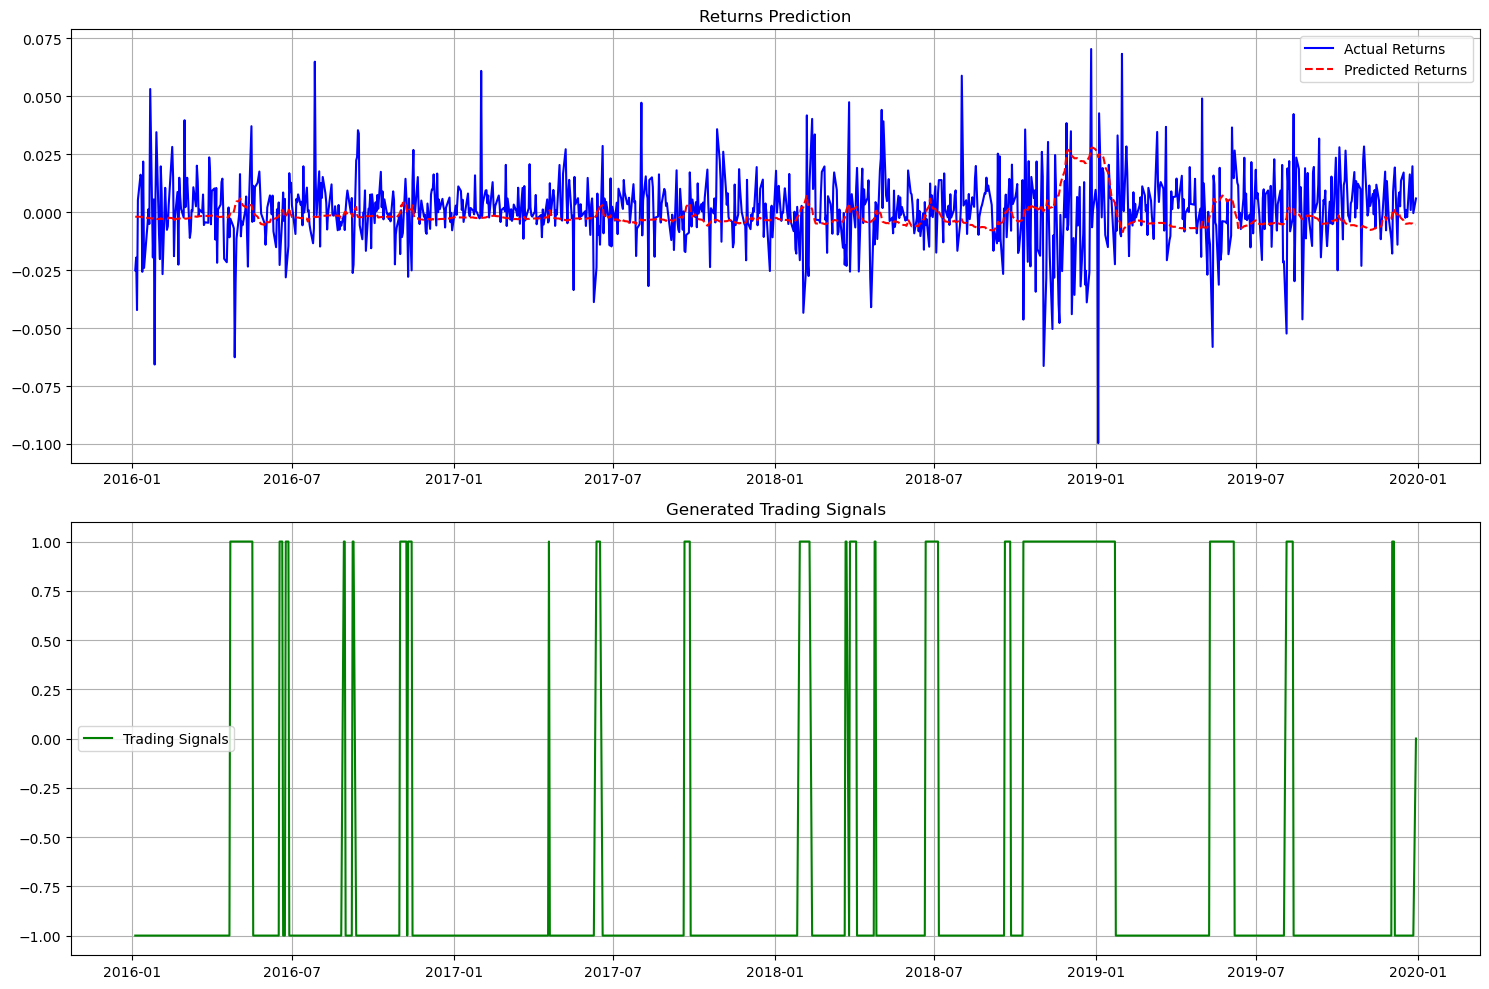


Cross-validation MSE scores:
Fold 1: 0.006563
Fold 2: 0.033271
Fold 3: 0.007263
Fold 4: 0.004413
Fold 5: 0.006599
Average MSE: 0.011622 (±0.010867)


In [7]:
nn_strategy_returns.plot_signals(out_sample_data)

# Backtest : train on in-sample data and evaluate performance out of sample

## Using prices prediction

In [13]:
in_sample_start = "2004-12-31"
in_sample_end = '2015-12-30'
out_sample_start = '2015-12-31'
out_sample_end = '2019-12-31'

# Ticker universe
tickers = [
    "AAPL", "ABT", "ADI", "ADM", "ADP", "ADSK", "AEE", "AEP", "AJG", "AKAM",
    "ALB", "AMAT", "AMD", "AME", "AMGN", "AMT", "AMZN", "AON", "AOS", "APA",
    "APD", "APH", "ARE", "AVB", "AVY", "AXP", "AZO", "BA", "BAC", "BAX",
    "BBY", "BDX", "BEN", "BIIB", "BK", "BLK", "BMY", "BSX", "BXP", "C",
    "CAG", "CAH", "CAT", "CB", "CCI", "CDNS", "CHD", "CHRW", "CINF", "CL",
    "CLX", "CMI", "CNP", "COO", "COP", "COST", "CPB", "CPRT", "CSCO", "CTAS",
    "CTSH", "D", "DE", "DGX", "DHI", "DIS", "DLTR", "DOV", "DRI", "DTE",
    "DVA", "EA", "EBAY", "ECL", "ED", "EFX", "EIX", "EL", "EMN", "EMR",
    "EOG", "EQR", "ES", "ESS", "F", "FAST", "FCX", "FDX", "FE", "FFIV",
    "FITB", "FRT", "GD", "GE", "GILD", "GIS", "GPC", "GWW", "HAL", "HAS"
] 

initial_cash = 100000
performance_summary = []
portfolio_series_list = []

for ticker in tickers:
    try:
        print(f"\nAnalyzing {ticker} - Price Prediction (In-Sample)")

        # In-sample data
        data_handler_in = DataHandler(ticker=ticker, start_date=in_sample_start, end_date=in_sample_end)
        in_sample_data = data_handler_in.fetch_data()

        if len(in_sample_data) < 100:
            print(f"Skipping {ticker} — insufficient in-sample data.")
            continue

        # Initialize and train strategy (only once)
        nn_strategy = TechnicalNNStrategy(prediction_type='price', n_splits=5, epochs=50)
        nn_strategy.fit(in_sample_data)

        # Out-of-sample data
        data_handler_out = DataHandler(ticker=ticker, start_date=out_sample_start, end_date=out_sample_end)
        out_sample_data = data_handler_out.fetch_data()

        if len(out_sample_data) < 100:
            print(f"Skipping {ticker} — insufficient out-of-sample data.")
            continue

        # Backtest using the trained model
        backtester = Backtest(out_sample_data, nn_strategy, initial_cash=initial_cash, plot_results=False)
        results = backtester.run()
        portfolio_series = backtester.get_portfolio_value_series()

        # Print out-of-sample performance
        print(f"\nOut-of-sample Backtest Results for {ticker}:")
        for key, value in results.items():
            print(f"{key}: {value:.4f}")

        # Save results
        performance_summary.append({'Ticker': ticker, **results})
        portfolio_series_list.append(portfolio_series.rename(ticker))

    except Exception as e:
        print(f"Error processing {ticker}: {e}")


Analyzing AAPL - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AAPL:
Final Value: 7082.7104
Return: -0.9292
Sharpe Ratio: -3.5524
Max Drawdown: -0.9386

Analyzing ABT - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ABT:
Final Value: 2379.5629
Return: -0.9762
Sharpe Ratio: -5.4399
Max Drawdown: -0.9762

Analyzing ADI - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ADI:
Final Value: 5769.8834
Return: -0.9423
Sharpe Ratio: -3.4704
Max Drawdown: -0.9451

Analyzing ADM - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ADM:
Final Value: 2273.9046
Return: -0.9773
Sharpe Ratio: -5.1261
Max Drawdown: -0.9786

Analyzing ADP - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ADP:
Final Value: 4038.3802
Return: -0.9596
Sharpe Ratio: -5.1950
Max Drawdown: -0.9614

Analyzing ADSK - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ADSK:
Final Value: 9593.0671
Return: -0.9041
Sharpe Ratio: -2.1100
Max Drawdown: -0.9180

Analyzing AEE - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AEE:
Final Value: 2742.0172
Return: -0.9726
Sharpe Ratio: -6.3448
Max Drawdown: -0.9726

Analyzing AEP - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AEP:
Final Value: 2346.5781
Return: -0.9765
Sharpe Ratio: -6.6806
Max Drawdown: -0.9765

Analyzing AJG - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AJG:
Final Value: 1972.4388
Return: -0.9803
Sharpe Ratio: -6.8357
Max Drawdown: -0.9803

Analyzing AKAM - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AKAM:
Final Value: 2217.8144
Return: -0.9778
Sharpe Ratio: -3.5660
Max Drawdown: -0.9782

Analyzing ALB - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ALB:
Final Value: 3577.2796
Return: -0.9642
Sharpe Ratio: -3.4803
Max Drawdown: -0.9705

Analyzing AMAT - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AMAT:
Final Value: 10369.4827
Return: -0.8963
Sharpe Ratio: -2.0244
Max Drawdown: -0.9048

Analyzing AMD - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AMD:
Final Value: 7212.7690
Return: -0.9279
Sharpe Ratio: -1.1274
Max Drawdown: -0.9465

Analyzing AME - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AME:
Final Value: 2709.4723
Return: -0.9729
Sharpe Ratio: -5.7519
Max Drawdown: -0.9729

Analyzing AMGN - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AMGN:
Final Value: 2337.7143
Return: -0.9766
Sharpe Ratio: -5.1155
Max Drawdown: -0.9778

Analyzing AMT - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AMT:
Final Value: 3362.7965
Return: -0.9664
Sharpe Ratio: -5.1921
Max Drawdown: -0.9674

Analyzing AMZN - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AMZN:
Final Value: 8665.7828
Return: -0.9133
Sharpe Ratio: -3.0204
Max Drawdown: -0.9252

Analyzing AON - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AON:
Final Value: 3026.5680
Return: -0.9697
Sharpe Ratio: -5.9670
Max Drawdown: -0.9702

Analyzing AOS - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AOS:
Final Value: 6195.3881
Return: -0.9380
Sharpe Ratio: -3.7585
Max Drawdown: -0.9442

Analyzing APA - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for APA:
Final Value: 489.8431
Return: -0.9951
Sharpe Ratio: -4.0283
Max Drawdown: -0.9966

Analyzing APD - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for APD:
Final Value: 1163.2752
Return: -0.9884
Sharpe Ratio: -7.2849
Max Drawdown: -0.9892

Analyzing APH - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for APH:
Final Value: 3759.2725
Return: -0.9624
Sharpe Ratio: -5.4101
Max Drawdown: -0.9651

Analyzing ARE - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ARE:
Final Value: 1610.5570
Return: -0.9839
Sharpe Ratio: -6.5985
Max Drawdown: -0.9839

Analyzing AVB - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AVB:
Final Value: 1766.4327
Return: -0.9823
Sharpe Ratio: -7.2825
Max Drawdown: -0.9823

Analyzing AVY - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AVY:
Final Value: 7273.9047
Return: -0.9273
Sharpe Ratio: -3.9244
Max Drawdown: -0.9304

Analyzing AXP - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AXP:
Final Value: 5127.0384
Return: -0.9487
Sharpe Ratio: -4.5352
Max Drawdown: -0.9487

Analyzing AZO - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AZO:
Final Value: 12294.7069
Return: -0.8771
Sharpe Ratio: -3.0360
Max Drawdown: -0.8823

Analyzing BA - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BA:
Final Value: 5449.5352
Return: -0.9455
Sharpe Ratio: -3.4756
Max Drawdown: -0.9455

Analyzing BAC - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BAC:
Final Value: 3083.8660
Return: -0.9692
Sharpe Ratio: -4.2736
Max Drawdown: -0.9694

Analyzing BAX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BAX:
Final Value: 3346.1112
Return: -0.9665
Sharpe Ratio: -5.4248
Max Drawdown: -0.9667

Analyzing BBY - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BBY:
Final Value: 1337.1006
Return: -0.9866
Sharpe Ratio: -4.4400
Max Drawdown: -0.9872

Analyzing BDX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BDX:
Final Value: 3193.8158
Return: -0.9681
Sharpe Ratio: -5.3659
Max Drawdown: -0.9681

Analyzing BEN - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BEN:
Final Value: 1170.8881
Return: -0.9883
Sharpe Ratio: -5.5338
Max Drawdown: -0.9886

Analyzing BIIB - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BIIB:
Final Value: 2956.8182
Return: -0.9704
Sharpe Ratio: -3.9136
Max Drawdown: -0.9705

Analyzing BK - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BK:
Final Value: 2420.5064
Return: -0.9758
Sharpe Ratio: -5.0463
Max Drawdown: -0.9758

Analyzing BLK - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BLK:
Final Value: 1428.6853
Return: -0.9857
Sharpe Ratio: -6.3769
Max Drawdown: -0.9859

Analyzing BMY - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BMY:
Final Value: 1431.2814
Return: -0.9857
Sharpe Ratio: -5.1646
Max Drawdown: -0.9861

Analyzing BSX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BSX:
Final Value: 3483.9725
Return: -0.9652
Sharpe Ratio: -4.4867
Max Drawdown: -0.9670

Analyzing BXP - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BXP:
Final Value: 1204.6856
Return: -0.9880
Sharpe Ratio: -7.2259
Max Drawdown: -0.9880

Analyzing C - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for C:
Final Value: 1288.7086
Return: -0.9871
Sharpe Ratio: -5.8739
Max Drawdown: -0.9877

Analyzing CAG - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CAG:
Final Value: 2093.4823
Return: -0.9791
Sharpe Ratio: -4.5823
Max Drawdown: -0.9811

Analyzing CAH - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CAH:
Final Value: 4779.0684
Return: -0.9522
Sharpe Ratio: -4.0715
Max Drawdown: -0.9522

Analyzing CAT - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CAT:
Final Value: 5282.0055
Return: -0.9472
Sharpe Ratio: -3.4585
Max Drawdown: -0.9483

Analyzing CB - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CB:
Final Value: 1877.9518
Return: -0.9812
Sharpe Ratio: -7.1625
Max Drawdown: -0.9812

Analyzing CCI - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CCI:
Final Value: 4050.7243
Return: -0.9595
Sharpe Ratio: -5.2453
Max Drawdown: -0.9603

Analyzing CDNS - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CDNS:
Final Value: 2875.2664
Return: -0.9712
Sharpe Ratio: -4.7713
Max Drawdown: -0.9717

Analyzing CHD - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CHD:
Final Value: 4211.5791
Return: -0.9579
Sharpe Ratio: -4.5321
Max Drawdown: -0.9592

Analyzing CHRW - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CHRW:
Final Value: 1611.4126
Return: -0.9839
Sharpe Ratio: -5.8572
Max Drawdown: -0.9839

Analyzing CINF - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CINF:
Final Value: 8953.3957
Return: -0.9105
Sharpe Ratio: -3.9550
Max Drawdown: -0.9180

Analyzing CL - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CL:
Final Value: 1213.9435
Return: -0.9879
Sharpe Ratio: -7.5387
Max Drawdown: -0.9883

Analyzing CLX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CLX:
Final Value: 2549.4947
Return: -0.9745
Sharpe Ratio: -5.6901
Max Drawdown: -0.9746

Analyzing CMI - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CMI:
Final Value: 3050.5619
Return: -0.9695
Sharpe Ratio: -4.5272
Max Drawdown: -0.9695

Analyzing CNP - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CNP:
Final Value: 1023.8102
Return: -0.9898
Sharpe Ratio: -7.1933
Max Drawdown: -0.9903

Analyzing COO - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for COO:
Final Value: 4296.9299
Return: -0.9570
Sharpe Ratio: -4.4876
Max Drawdown: -0.9601

Analyzing COP - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for COP:
Final Value: 2460.4499
Return: -0.9754
Sharpe Ratio: -3.8564
Max Drawdown: -0.9754

Analyzing COST - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for COST:
Final Value: 3295.4678
Return: -0.9670
Sharpe Ratio: -5.4238
Max Drawdown: -0.9670

Analyzing CPB - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CPB:
Final Value: 1874.2838
Return: -0.9813
Sharpe Ratio: -5.3766
Max Drawdown: -0.9817

Analyzing CPRT - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CPRT:
Final Value: 10752.6951
Return: -0.8925
Sharpe Ratio: -2.7967
Max Drawdown: -0.8925

Analyzing CSCO - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CSCO:
Final Value: 4188.3026
Return: -0.9581
Sharpe Ratio: -4.5381
Max Drawdown: -0.9608

Analyzing CTAS - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CTAS:
Final Value: 13782.9550
Return: -0.8622
Sharpe Ratio: -2.9913
Max Drawdown: -0.8664

Analyzing CTSH - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CTSH:
Final Value: 1430.3490
Return: -0.9857
Sharpe Ratio: -5.5669
Max Drawdown: -0.9862

Analyzing D - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for D:
Final Value: 2280.5273
Return: -0.9772
Sharpe Ratio: -6.7020
Max Drawdown: -0.9773

Analyzing DE - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DE:
Final Value: 1777.9898
Return: -0.9822
Sharpe Ratio: -5.1002
Max Drawdown: -0.9822

Analyzing DGX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DGX:
Final Value: 2823.8607
Return: -0.9718
Sharpe Ratio: -6.2267
Max Drawdown: -0.9718

Analyzing DHI - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DHI:
Final Value: 1637.8793
Return: -0.9836
Sharpe Ratio: -4.9962
Max Drawdown: -0.9837

Analyzing DIS - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DIS:
Final Value: 1541.0812
Return: -0.9846
Sharpe Ratio: -6.8881
Max Drawdown: -0.9846

Analyzing DLTR - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DLTR:
Final Value: 3199.9664
Return: -0.9680
Sharpe Ratio: -3.7670
Max Drawdown: -0.9680

Analyzing DOV - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DOV:
Final Value: 2134.2881
Return: -0.9787
Sharpe Ratio: -5.2584
Max Drawdown: -0.9795

Analyzing DRI - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DRI:
Final Value: 3669.1692
Return: -0.9633
Sharpe Ratio: -4.4004
Max Drawdown: -0.9646

Analyzing DTE - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DTE:
Final Value: 2718.2544
Return: -0.9728
Sharpe Ratio: -6.6905
Max Drawdown: -0.9735

Analyzing DVA - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DVA:
Final Value: 5763.3298
Return: -0.9424
Sharpe Ratio: -3.1302
Max Drawdown: -0.9469

Analyzing EA - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EA:
Final Value: 1869.0227
Return: -0.9813
Sharpe Ratio: -4.2660
Max Drawdown: -0.9822

Analyzing EBAY - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EBAY:
Final Value: 3199.6407
Return: -0.9680
Sharpe Ratio: -3.9890
Max Drawdown: -0.9687

Analyzing ECL - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ECL:
Final Value: 3948.0595
Return: -0.9605
Sharpe Ratio: -5.9378
Max Drawdown: -0.9621

Analyzing ED - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ED:
Final Value: 2988.8558
Return: -0.9701
Sharpe Ratio: -6.3751
Max Drawdown: -0.9718

Analyzing EFX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EFX:
Final Value: 4441.5870
Return: -0.9556
Sharpe Ratio: -4.2643
Max Drawdown: -0.9563

Analyzing EIX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EIX:
Final Value: 1465.0614
Return: -0.9853
Sharpe Ratio: -5.9102
Max Drawdown: -0.9860

Analyzing EL - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EL:
Final Value: 3510.6187
Return: -0.9649
Sharpe Ratio: -4.5034
Max Drawdown: -0.9649

Analyzing EMN - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EMN:
Final Value: 3176.9909
Return: -0.9682
Sharpe Ratio: -4.7410
Max Drawdown: -0.9682

Analyzing EMR - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EMR:
Final Value: 2954.0124
Return: -0.9705
Sharpe Ratio: -5.0310
Max Drawdown: -0.9726

Analyzing EOG - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EOG:
Final Value: 2140.4483
Return: -0.9786
Sharpe Ratio: -4.0330
Max Drawdown: -0.9805

Analyzing EQR - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EQR:
Final Value: 2981.4431
Return: -0.9702
Sharpe Ratio: -6.2866
Max Drawdown: -0.9702

Analyzing ES - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ES:
Final Value: 2248.9425
Return: -0.9775
Sharpe Ratio: -6.8422
Max Drawdown: -0.9779

Analyzing ESS - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ESS:
Final Value: 3248.4418
Return: -0.9675
Sharpe Ratio: -5.8192
Max Drawdown: -0.9675

Analyzing F - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for F:
Final Value: 1811.7090
Return: -0.9819
Sharpe Ratio: -4.7861
Max Drawdown: -0.9824

Analyzing FAST - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for FAST:
Final Value: 3153.1413
Return: -0.9685
Sharpe Ratio: -4.2202
Max Drawdown: -0.9685

Analyzing FCX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for FCX:
Final Value: 3398.1137
Return: -0.9660
Sharpe Ratio: -1.9174
Max Drawdown: -0.9773

Analyzing FDX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for FDX:
Final Value: 6781.8065
Return: -0.9322
Sharpe Ratio: -3.3210
Max Drawdown: -0.9350

Analyzing FE - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for FE:
Final Value: 1866.0964
Return: -0.9813
Sharpe Ratio: -5.8080
Max Drawdown: -0.9813

Analyzing FFIV - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for FFIV:
Final Value: 4528.7328
Return: -0.9547
Sharpe Ratio: -3.6298
Max Drawdown: -0.9547

Analyzing FITB - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for FITB:
Final Value: 1530.2609
Return: -0.9847
Sharpe Ratio: -5.0636
Max Drawdown: -0.9848

Analyzing FRT - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for FRT:
Final Value: 976.3692
Return: -0.9902
Sharpe Ratio: -8.3934
Max Drawdown: -0.9902

Analyzing GD - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for GD:
Final Value: 1232.8886
Return: -0.9877
Sharpe Ratio: -7.0323
Max Drawdown: -0.9879

Analyzing GE - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for GE:
Final Value: 1039.5271
Return: -0.9896
Sharpe Ratio: -4.7831
Max Drawdown: -0.9896

Analyzing GILD - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for GILD:
Final Value: 1095.1487
Return: -0.9890
Sharpe Ratio: -5.9420
Max Drawdown: -0.9890

Analyzing GIS - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for GIS:
Final Value: 2386.3643
Return: -0.9761
Sharpe Ratio: -6.0824
Max Drawdown: -0.9761

Analyzing GPC - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for GPC:
Final Value: 3079.4612
Return: -0.9692
Sharpe Ratio: -5.0929
Max Drawdown: -0.9715

Analyzing GWW - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for GWW:
Final Value: 4372.1141
Return: -0.9563
Sharpe Ratio: -3.4661
Max Drawdown: -0.9573

Analyzing HAL - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for HAL:
Final Value: 1250.1376
Return: -0.9875
Sharpe Ratio: -4.5444
Max Drawdown: -0.9892

Analyzing HAS - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for HAS:
Final Value: 1443.7016
Return: -0.9856
Sharpe Ratio: -5.3650
Max Drawdown: -0.9856


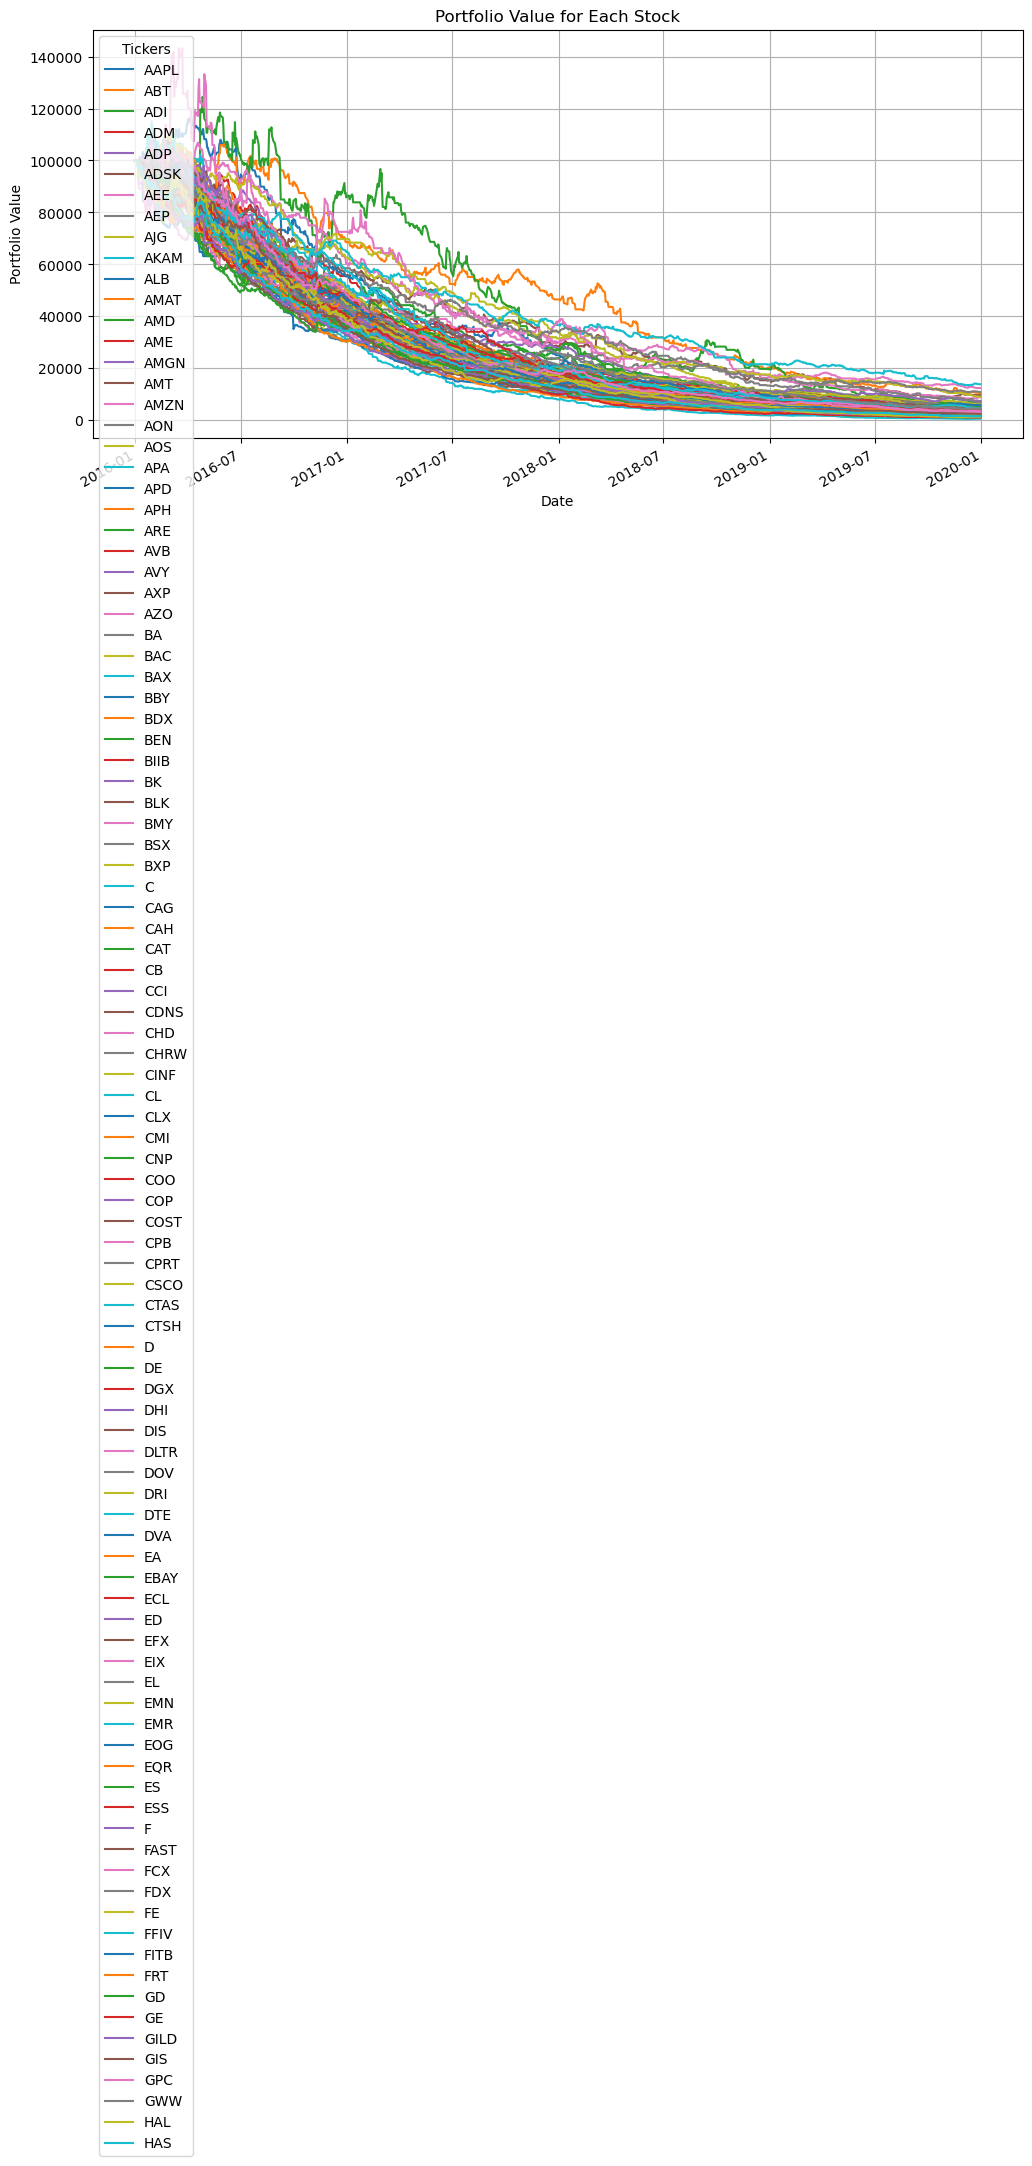

In [22]:
# Optionally, visualize overall performance of all stocks
# Combine all portfolio series
combined_portfolio = pd.concat(portfolio_series_list, axis=1)
combined_portfolio.plot(figsize=(12, 6))
plt.title('Portfolio Value for Each Stock')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend(title='Tickers')
plt.grid(True)
plt.show()


In [23]:
# Create DataFrame
perf_df = pd.DataFrame(performance_summary)

# Summary statistics
print("\n=== Summary Statistics ===")
print(perf_df.describe().round(4))

# Mean values
mean_metrics = perf_df[['Return', 'Sharpe Ratio', 'Final Value', 'Max Drawdown']].mean()
print("\n=== Mean Metrics ===")
print(mean_metrics.round(4))


=== Summary Statistics ===
       Final Value    Return  Sharpe Ratio  Max Drawdown
count     100.0000  100.0000      100.0000      100.0000
mean     3444.7379   -0.9656       -4.9669       -0.9672
std      2508.6792    0.0251        1.3735        0.0233
min       489.8431   -0.9951       -8.3934       -0.9966
25%      1803.2792   -0.9820       -5.8830       -0.9822
50%      2914.6394   -0.9709       -5.0550       -0.9722
75%      4041.4662   -0.9596       -4.0185       -0.9613
max     13782.9550   -0.8622       -1.1274       -0.8664

=== Mean Metrics ===
Return            -0.9656
Sharpe Ratio      -4.9669
Final Value     3444.7379
Max Drawdown      -0.9672
dtype: float64


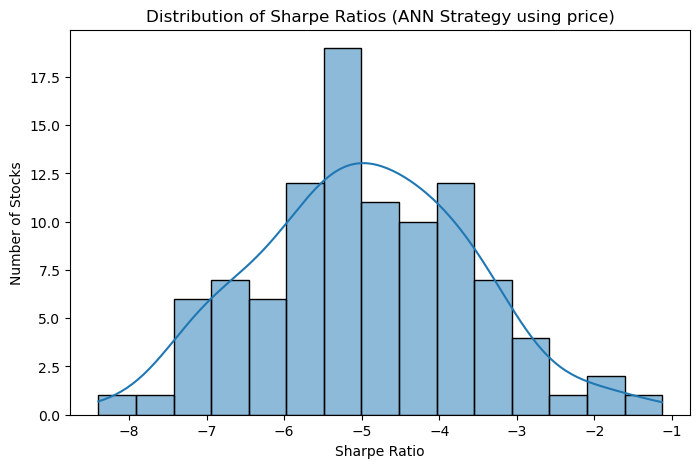

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(perf_df['Sharpe Ratio'], kde=True, bins=15)
plt.title('Distribution of Sharpe Ratios (ANN Strategy using price)')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Number of Stocks')
plt.show()


## Using returns predictions

In [13]:
in_sample_start = "2004-12-31"
in_sample_end = '2015-12-30'
out_sample_start = '2015-12-31'
out_sample_end = '2019-12-31'

# Ticker universe
tickers = [
    "AAPL", "ABT", "ADI", "ADM", "ADP", "ADSK", "AEE", "AEP", "AJG", "AKAM",
    "ALB", "AMAT", "AMD", "AME", "AMGN", "AMT", "AMZN", "AON", "AOS", "APA",
    "APD", "APH", "ARE", "AVB", "AVY", "AXP", "AZO", "BA", "BAC", "BAX",
    "BBY", "BDX", "BEN", "BIIB", "BK", "BLK", "BMY", "BSX", "BXP", "C",
    "CAG", "CAH", "CAT", "CB", "CCI", "CDNS", "CHD", "CHRW", "CINF", "CL",
    "CLX", "CMI", "CNP", "COO", "COP", "COST", "CPB", "CPRT", "CSCO", "CTAS",
    "CTSH", "D", "DE", "DGX", "DHI", "DIS", "DLTR", "DOV", "DRI", "DTE",
    "DVA", "EA", "EBAY", "ECL", "ED", "EFX", "EIX", "EL", "EMN", "EMR",
    "EOG", "EQR", "ES", "ESS", "F", "FAST", "FCX", "FDX", "FE", "FFIV",
    "FITB", "FRT", "GD", "GE", "GILD", "GIS", "GPC", "GWW", "HAL", "HAS"
] 

initial_cash = 100000
performance_summary_return = []
portfolio_series_list_return = []

for ticker in tickers:
    try:
        print(f"\nAnalyzing {ticker} - Price Prediction (In-Sample)")

        # In-sample data
        data_handler_in = DataHandler(ticker=ticker, start_date=in_sample_start, end_date=in_sample_end)
        in_sample_data = data_handler_in.fetch_data()

        if len(in_sample_data) < 100:
            print(f"Skipping {ticker} — insufficient in-sample data.")
            continue

        # Initialize and train strategy (only once)
        nn_strategy = TechnicalNNStrategy(prediction_type='return', n_splits=5, epochs=50)
        nn_strategy.fit(in_sample_data)

        # Out-of-sample data
        data_handler_out = DataHandler(ticker=ticker, start_date=out_sample_start, end_date=out_sample_end)
        out_sample_data = data_handler_out.fetch_data()

        if len(out_sample_data) < 100:
            print(f"Skipping {ticker} — insufficient out-of-sample data.")
            continue

        # Backtest using the trained model
        backtester = Backtest(out_sample_data, nn_strategy, initial_cash=initial_cash, plot_results=False)
        results = backtester.run()
        portfolio_series = backtester.get_portfolio_value_series()

        # Print out-of-sample performance
        print(f"\nOut-of-sample Backtest Results for {ticker}:")
        for key, value in results.items():
            print(f"{key}: {value:.4f}")

        # Save results
        performance_summary_return.append({'Ticker': ticker, **results})
        portfolio_series_list_return.append(portfolio_series.rename(ticker))

    except Exception as e:
        print(f"Error processing {ticker}: {e}")

[*********************100%***********************]  1 of 1 completed


Analyzing AAPL - Price Prediction (In-Sample)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Out-of-sample Backtest Results for AAPL:
Final Value: 77817.2743
Return: -0.2218
Sharpe Ratio: -0.1691
Max Drawdown: -0.4941

Analyzing ABT - Price Prediction (In-Sample)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Out-of-sample Backtest Results for ABT:
Final Value: 67962.6778
Return: -0.3204
Sharpe Ratio: -1.0816
Max Drawdown: -0.3279

Analyzing ADI - Price Prediction (In-Sample)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Out-of-sample Backtest Results for ADI:
Final Value: 95095.1580
Return: -0.0490
Sharpe Ratio: -0.0117
Max Drawdown: -0.2508

Analyzing ADM - Price Prediction (In-Sample)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Out-of-sample Backtest Results for ADM:
Final Value: 77641.4424
Return: -0.2236
Sharpe Ratio: -1.3148
Max Drawdown: -0.2403

Analyzing ADP - Price Prediction (In-Sample)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Out-of-sample Backtest Results for ADP:
Final Value: 87543.6400
Return: -0.1246
Sharpe Ratio: -0.2120
Max Drawdown: -0.2110

Analyzing ADSK - Price Prediction (In-Sample)



[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ADSK:
Final Value: 131915.6475
Return: 0.3192
Sharpe Ratio: 0.3770
Max Drawdown: -0.3381

Analyzing AEE - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AEE:
Final Value: 70873.3616
Return: -0.2913
Sharpe Ratio: -0.5219
Max Drawdown: -0.4223

Analyzing AEP - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AEP:
Final Value: 50564.2149
Return: -0.4944
Sharpe Ratio: -1.4305
Max Drawdown: -0.5551

Analyzing AJG - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AJG:
Final Value: 96058.1850
Return: -0.0394
Sharpe Ratio: -0.0569
Max Drawdown: -0.2082

Analyzing AKAM - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AKAM:
Final Value: 65318.5943
Return: -0.3468
Sharpe Ratio: -0.2777
Max Drawdown: -0.4048

Analyzing ALB - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ALB:
Final Value: 117691.6541
Return: 0.1769
Sharpe Ratio: 0.3912
Max Drawdown: -0.1364

Analyzing AMAT - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AMAT:
Final Value: 123757.1801
Return: 0.2376
Sharpe Ratio: 0.3310
Max Drawdown: -0.4472

Analyzing AMD - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AMD:
Final Value: 114324.9772
Return: 0.1432
Sharpe Ratio: 0.2659
Max Drawdown: -0.4440

Analyzing AME - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AME:
Final Value: 68085.8841
Return: -0.3191
Sharpe Ratio: -0.4791
Max Drawdown: -0.4339

Analyzing AMGN - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AMGN:
Final Value: 128004.7460
Return: 0.2800
Sharpe Ratio: 0.3936
Max Drawdown: -0.2515

Analyzing AMT - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AMT:
Final Value: 69951.0359
Return: -0.3005
Sharpe Ratio: -0.6177
Max Drawdown: -0.3740

Analyzing AMZN - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AMZN:
Final Value: 271864.9113
Return: 1.7186
Sharpe Ratio: 1.0414
Max Drawdown: -0.3410

Analyzing AON - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AON:
Final Value: 128674.0390
Return: 0.2867
Sharpe Ratio: 0.4634
Max Drawdown: -0.1699

Analyzing AOS - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AOS:
Final Value: 133065.0986
Return: 0.3307
Sharpe Ratio: 0.4243
Max Drawdown: -0.3895

Analyzing APA - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for APA:
Final Value: 65464.2399
Return: -0.3454
Sharpe Ratio: -0.1073
Max Drawdown: -0.5963

Analyzing APD - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for APD:
Final Value: 37247.9769
Return: -0.6275
Sharpe Ratio: -1.7952
Max Drawdown: -0.6778

Analyzing APH - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for APH:
Final Value: 93854.2392
Return: -0.0615
Sharpe Ratio: -0.1015
Max Drawdown: -0.1962

Analyzing ARE - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ARE:
Final Value: 98676.9300
Return: -0.0132
Sharpe Ratio: -0.4769
Max Drawdown: -0.0166

Analyzing AVB - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AVB:
Final Value: 83442.4213
Return: -0.1656
Sharpe Ratio: -0.3457
Max Drawdown: -0.2802

Analyzing AVY - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AVY:
Final Value: 161670.4534
Return: 0.6167
Sharpe Ratio: 0.7009
Max Drawdown: -0.3037

Analyzing AXP - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AXP:
Final Value: 60696.0910
Return: -0.3930
Sharpe Ratio: -0.8336
Max Drawdown: -0.4380

Analyzing AZO - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for AZO:
Final Value: 52522.7006
Return: -0.4748
Sharpe Ratio: -0.7090
Max Drawdown: -0.4999

Analyzing BA - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BA:
Final Value: 86477.3044
Return: -0.1352
Sharpe Ratio: -0.0424
Max Drawdown: -0.2637

Analyzing BAC - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BAC:
Final Value: 83395.9655
Return: -0.1660
Sharpe Ratio: -0.5139
Max Drawdown: -0.2335

Analyzing BAX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BAX:
Final Value: 126515.8507
Return: 0.2652
Sharpe Ratio: 0.4420
Max Drawdown: -0.2087

Analyzing BBY - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BBY:
Final Value: 73225.7941
Return: -0.2677
Sharpe Ratio: -0.2548
Max Drawdown: -0.4871

Analyzing BDX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BDX:
Final Value: 109676.4291
Return: 0.0968
Sharpe Ratio: 0.2265
Max Drawdown: -0.2034

Analyzing BEN - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BEN:
Final Value: 52303.4358
Return: -0.4770
Sharpe Ratio: -0.9281
Max Drawdown: -0.4968

Analyzing BIIB - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BIIB:
Final Value: 98782.2181
Return: -0.0122
Sharpe Ratio: 0.1743
Max Drawdown: -0.4347

Analyzing BK - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BK:
Final Value: 74449.2124
Return: -0.2555
Sharpe Ratio: -0.4332
Max Drawdown: -0.3315

Analyzing BLK - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BLK:
Final Value: 149922.6955
Return: 0.4992
Sharpe Ratio: 0.5723
Max Drawdown: -0.3809

Analyzing BMY - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BMY:
Final Value: 86681.9872
Return: -0.1332
Sharpe Ratio: -0.0054
Max Drawdown: -0.4812

Analyzing BSX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BSX:
Final Value: 101570.4736
Return: 0.0157
Sharpe Ratio: 0.1377
Max Drawdown: -0.0481

Analyzing BXP - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for BXP:
Final Value: 112696.6075
Return: 0.1270
Sharpe Ratio: 0.2557
Max Drawdown: -0.2019

Analyzing C - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for C:
Final Value: 75983.0214
Return: -0.2402
Sharpe Ratio: -1.0083
Max Drawdown: -0.2705

Analyzing CAG - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CAG:
Final Value: 115172.8533
Return: 0.1517
Sharpe Ratio: 0.2674
Max Drawdown: -0.4767

Analyzing CAH - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CAH:
Final Value: 55431.7406
Return: -0.4457
Sharpe Ratio: -0.3683
Max Drawdown: -0.5499

Analyzing CAT - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CAT:
Final Value: 116976.6093
Return: 0.1698
Sharpe Ratio: 0.3489
Max Drawdown: -0.2082

Analyzing CB - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CB:
Final Value: 77083.7527
Return: -0.2292
Sharpe Ratio: -0.6828
Max Drawdown: -0.2606

Analyzing CCI - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CCI:
Final Value: 131324.0959
Return: 0.3132
Sharpe Ratio: 0.4661
Max Drawdown: -0.1989

Analyzing CDNS - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CDNS:
Final Value: 83243.7175
Return: -0.1676
Sharpe Ratio: -0.1224
Max Drawdown: -0.3937

Analyzing CHD - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CHD:
Final Value: 98297.6243
Return: -0.0170
Sharpe Ratio: 0.0705
Max Drawdown: -0.2967

Analyzing CHRW - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CHRW:
Final Value: 98143.5316
Return: -0.0186
Sharpe Ratio: -0.1416
Max Drawdown: -0.0551

Analyzing CINF - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CINF:
Final Value: 135677.4281
Return: 0.3568
Sharpe Ratio: 0.5192
Max Drawdown: -0.2502

Analyzing CL - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CL:
Final Value: 67890.0962
Return: -0.3211
Sharpe Ratio: -0.7148
Max Drawdown: -0.3378

Analyzing CLX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CLX:
Final Value: 87349.6112
Return: -0.1265
Sharpe Ratio: -0.1141
Max Drawdown: -0.3359

Analyzing CMI - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CMI:
Final Value: 94408.9116
Return: -0.0559
Sharpe Ratio: 0.0126
Max Drawdown: -0.4203

Analyzing CNP - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CNP:
Final Value: 59901.3672
Return: -0.4010
Sharpe Ratio: -0.9469
Max Drawdown: -0.4516

Analyzing COO - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for COO:
Final Value: 85364.6970
Return: -0.1464
Sharpe Ratio: -0.8352
Max Drawdown: -0.1464

Analyzing COP - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for COP:
Final Value: 90334.7240
Return: -0.0967
Sharpe Ratio: -0.1483
Max Drawdown: -0.1709

Analyzing COST - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for COST:
Final Value: 69177.1353
Return: -0.3082
Sharpe Ratio: -0.6456
Max Drawdown: -0.4185

Analyzing CPB - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CPB:
Final Value: 47965.2965
Return: -0.5203
Sharpe Ratio: -0.6407
Max Drawdown: -0.7139

Analyzing CPRT - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CPRT:
Final Value: 81946.3509
Return: -0.1805
Sharpe Ratio: -0.8522
Max Drawdown: -0.2348

Analyzing CSCO - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CSCO:
Final Value: 70786.6945
Return: -0.2921
Sharpe Ratio: -0.3341
Max Drawdown: -0.4173

Analyzing CTAS - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CTAS:
Final Value: 157214.7690
Return: 0.5721
Sharpe Ratio: 0.6688
Max Drawdown: -0.2790

Analyzing CTSH - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for CTSH:
Final Value: 40653.1435
Return: -0.5935
Sharpe Ratio: -0.8874
Max Drawdown: -0.6214

Analyzing D - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for D:
Final Value: 58803.3871
Return: -0.4120
Sharpe Ratio: -2.1146
Max Drawdown: -0.4194

Analyzing DE - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DE:
Final Value: 98680.5645
Return: -0.0132
Sharpe Ratio: 0.0055
Max Drawdown: -0.1108

Analyzing DGX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DGX:
Final Value: 126382.1690
Return: 0.2638
Sharpe Ratio: 0.4140
Max Drawdown: -0.3030

Analyzing DHI - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DHI:
Final Value: 78932.7453
Return: -0.2107
Sharpe Ratio: -0.5260
Max Drawdown: -0.2817

Analyzing DIS - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DIS:
Final Value: 105322.9954
Return: 0.0532
Sharpe Ratio: 0.1612
Max Drawdown: -0.1778

Analyzing DLTR - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DLTR:
Final Value: 128736.8744
Return: 0.2874
Sharpe Ratio: 0.6604
Max Drawdown: -0.1977

Analyzing DOV - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DOV:
Final Value: 114804.1348
Return: 0.1480
Sharpe Ratio: 0.2954
Max Drawdown: -0.3002

Analyzing DRI - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DRI:
Final Value: 43302.2809
Return: -0.5670
Sharpe Ratio: -1.4047
Max Drawdown: -0.5674

Analyzing DTE - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DTE:
Final Value: 72724.0447
Return: -0.2728
Sharpe Ratio: -0.6922
Max Drawdown: -0.3889

Analyzing DVA - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for DVA:
Final Value: 85011.0871
Return: -0.1499
Sharpe Ratio: -0.3267
Max Drawdown: -0.2401

Analyzing EA - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EA:
Final Value: 59409.5463
Return: -0.4059
Sharpe Ratio: -0.6012
Max Drawdown: -0.5104

Analyzing EBAY - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EBAY:
Final Value: 20650.4215
Return: -0.7935
Sharpe Ratio: -1.8166
Max Drawdown: -0.8026

Analyzing ECL - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ECL:
Final Value: 70667.5539
Return: -0.2933
Sharpe Ratio: -0.7015
Max Drawdown: -0.3303

Analyzing ED - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ED:
Final Value: 68450.1963
Return: -0.3155
Sharpe Ratio: -0.5775
Max Drawdown: -0.4884

Analyzing EFX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EFX:
Final Value: 131161.4364
Return: 0.3116
Sharpe Ratio: 0.4062
Max Drawdown: -0.3724

Analyzing EIX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EIX:
Final Value: 72745.9451
Return: -0.2725
Sharpe Ratio: -0.4364
Max Drawdown: -0.3363

Analyzing EL - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EL:
Final Value: 93227.3636
Return: -0.0677
Sharpe Ratio: 0.0127
Max Drawdown: -0.3862

Analyzing EMN - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EMN:
Final Value: 78321.8407
Return: -0.2168
Sharpe Ratio: -0.4934
Max Drawdown: -0.2924

Analyzing EMR - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EMR:
Final Value: 83533.6680
Return: -0.1647
Sharpe Ratio: -0.6124
Max Drawdown: -0.1814

Analyzing EOG - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EOG:
Final Value: 70066.0457
Return: -0.2993
Sharpe Ratio: -0.3205
Max Drawdown: -0.5599

Analyzing EQR - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for EQR:
Final Value: 65554.5960
Return: -0.3445
Sharpe Ratio: -0.9262
Max Drawdown: -0.4071

Analyzing ES - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ES:
Final Value: 66015.7837
Return: -0.3398
Sharpe Ratio: -0.6551
Max Drawdown: -0.4521

Analyzing ESS - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for ESS:
Final Value: 137681.0891
Return: 0.3768
Sharpe Ratio: 0.5371
Max Drawdown: -0.2070

Analyzing F - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for F:
Final Value: 40621.8624
Return: -0.5938
Sharpe Ratio: -1.1454
Max Drawdown: -0.6605

Analyzing FAST - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for FAST:
Final Value: 74430.6589
Return: -0.2557
Sharpe Ratio: -0.8231
Max Drawdown: -0.2760

Analyzing FCX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for FCX:
Final Value: 112687.1467
Return: 0.1269
Sharpe Ratio: 0.3173
Max Drawdown: -0.6261

Analyzing FDX - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for FDX:
Final Value: 96204.0694
Return: -0.0380
Sharpe Ratio: 0.0903
Max Drawdown: -0.5099

Analyzing FE - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for FE:
Final Value: 62620.4541
Return: -0.3738
Sharpe Ratio: -1.6505
Max Drawdown: -0.3738

Analyzing FFIV - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for FFIV:
Final Value: 75328.8220
Return: -0.2467
Sharpe Ratio: -0.8634
Max Drawdown: -0.2644

Analyzing FITB - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for FITB:
Final Value: 172275.8216
Return: 0.7228
Sharpe Ratio: 0.6576
Max Drawdown: -0.3408

Analyzing FRT - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for FRT:
Final Value: 97183.7634
Return: -0.0282
Sharpe Ratio: 0.0458
Max Drawdown: -0.3364

Analyzing GD - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for GD:
Final Value: 138075.4035
Return: 0.3808
Sharpe Ratio: 0.5194
Max Drawdown: -0.3464

Analyzing GE - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for GE:
Final Value: 18240.6790
Return: -0.8176
Sharpe Ratio: -1.3889
Max Drawdown: -0.8430

Analyzing GILD - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for GILD:
Final Value: 73070.1662
Return: -0.2693
Sharpe Ratio: -0.2011
Max Drawdown: -0.3601

Analyzing GIS - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for GIS:
Final Value: 47376.4319
Return: -0.5262
Sharpe Ratio: -1.8089
Max Drawdown: -0.5440

Analyzing GPC - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for GPC:
Final Value: 81618.1111
Return: -0.1838
Sharpe Ratio: -0.5064
Max Drawdown: -0.2730

Analyzing GWW - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for GWW:
Final Value: 102140.0012
Return: 0.0214
Sharpe Ratio: 0.1460
Max Drawdown: -0.3776

Analyzing HAL - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for HAL:
Final Value: 59900.0622
Return: -0.4010
Sharpe Ratio: -0.8063
Max Drawdown: -0.5020

Analyzing HAS - Price Prediction (In-Sample)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Out-of-sample Backtest Results for HAS:
Final Value: 89322.4001
Return: -0.1068
Sharpe Ratio: 0.0296
Max Drawdown: -0.4659


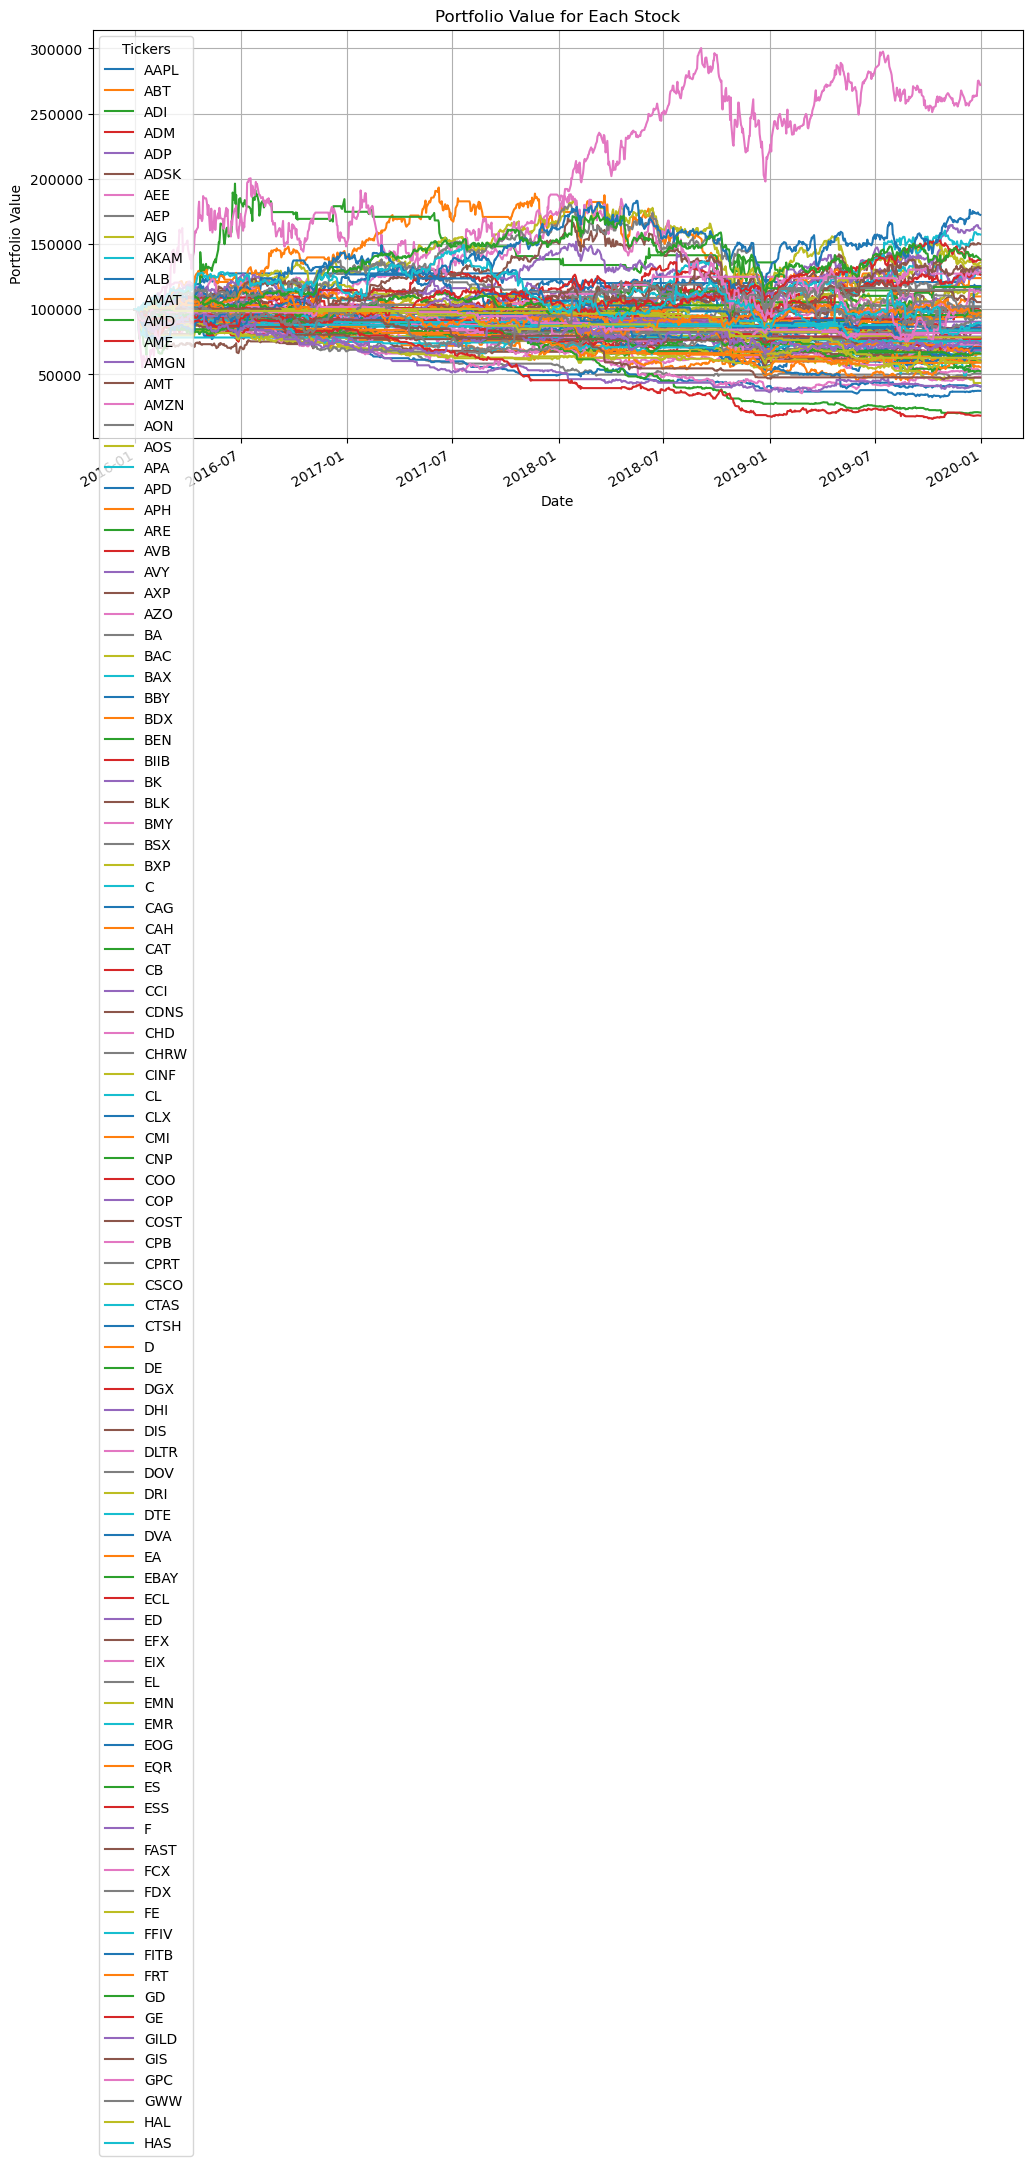

In [14]:
# Optionally, visualize overall performance of all stocks
# Combine all portfolio series
combined_portfolio = pd.concat(portfolio_series_list_return, axis=1)
combined_portfolio.plot(figsize=(12, 6))
plt.title('Portfolio Value for Each Stock')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend(title='Tickers')
plt.grid(True)
plt.show()


In [15]:
# Create DataFrame
perf_df_return = pd.DataFrame(performance_summary_return)

# Summary statistics
print("\n=== Summary Statistics ===")
print(perf_df_return.describe().round(4))

# Mean values
mean_metrics_return = perf_df_return[['Return', 'Sharpe Ratio', 'Final Value', 'Max Drawdown']].mean()
print("\n=== Mean Metrics ===")
print(mean_metrics_return.round(4))


=== Summary Statistics ===
       Final Value    Return  Sharpe Ratio  Max Drawdown
count     100.0000  100.0000      100.0000      100.0000
mean    89970.9154   -0.1003       -0.2971       -0.3614
std     35526.1050    0.3553        0.6482        0.1569
min     18240.6790   -0.8176       -2.1146       -0.8430
25%     68359.1182   -0.3164       -0.6945       -0.4517
50%     83488.0446   -0.1651       -0.2334       -0.3409
75%    110429.1085    0.1043        0.2338       -0.2506
max    271864.9113    1.7186        1.0414       -0.0166

=== Mean Metrics ===
Return             -0.1003
Sharpe Ratio       -0.2971
Final Value     89970.9154
Max Drawdown       -0.3614
dtype: float64


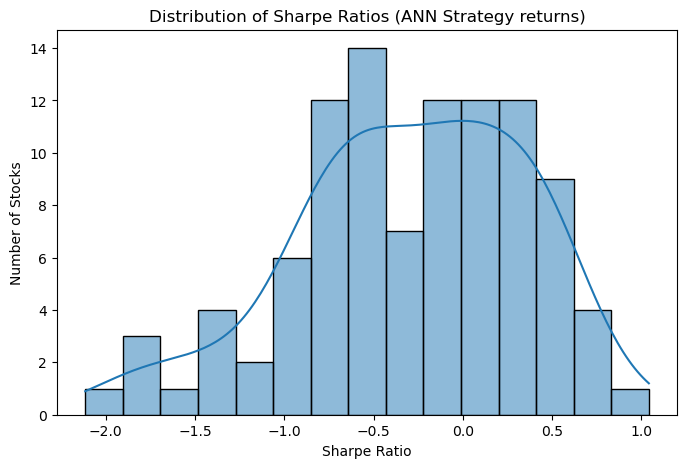

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(perf_df_return['Sharpe Ratio'], kde=True, bins=15)
plt.title('Distribution of Sharpe Ratios (ANN Strategy returns)')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Number of Stocks')
plt.show()
